# Jacobian 

In [3]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from math import cos, sin
from math import sqrt

In [4]:
# Define DH function
def dh_matrix(theta, d, gama, alpha):
    T_1 = np.array([[cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), gama*cos(theta)],
                  [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), gama*sin(theta)],
                   [0, sin(alpha), cos(alpha), d],
                   [0, 0, 0, 1]])
    return T_1
    
def trans(x, y, z):
    T_2 = np.eye(4)
    T_2[:,3] = np.array([x,y,z,1]).T
    return T_2
    
def rot_z(theta):
    rot_matrix = np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                           [np.sin(theta), np.cos(theta), 0, 0],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])
    return rot_matrix

def rot_x(alpha):
    rot_matrix = np.array([[1, 0, 0, 0],
                           [0, np.cos(alpha), -np.sin(alpha), 0],
                           [0, np.sin(alpha), np.cos(alpha), 0],
                           [0, 0, 0, 1]])
    return rot_matrix

[[ 0.80901699 -0.58778525  0.          2.42705098]
 [ 0.58778525  0.80901699 -0.          1.76335576]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]] 
 [[ 0.40673664 -0.91354546  0.          2.83378763]
 [ 0.91354546  0.40673664  0.          2.67690121]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]] 
 [[-0.20791169 -0.9781476   0.          3.14619028]
 [ 0.9781476  -0.20791169  0.          5.59467291]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
[0. 0.]
[2.42705098 1.76335576]
[2.83378763 2.67690121]


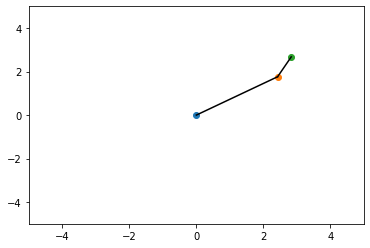

In [5]:
p0 = np.array([0., 0., 0., 1.])

d1 = 3
d2 = 1

q1, q2 = pi/5, pi/6

T01 = dh_matrix(q1, 0, d1, 0)
T02 = dh_matrix(q1, 0, d1, 0) @ dh_matrix(q2, 0, d2, 0)
print(T01, '\n', T02, '\n', T01@T02)

p1 = dh_matrix(q1, 0, d1, 0) @ p0
p2 = dh_matrix(q1, 0, d1, 0) @ dh_matrix(q2, 0, d2, 0) @ p0


p = np.asarray([p0.T, p1.T, p2.T])

fig = plt.figure()
# ax = plt.axes(projection='3d')
ax = plt.axes()
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5);

for i in range(p.shape[0]):
    print(p[i][0:2])
    ax.scatter(p[i][0], p[i][1])
    if i != 0:
        ax.plot([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], 'k')




In [6]:
np.asarray([3.09807621, 2.3660254]) - np.asarray([2.83378763, 2.67690121])

array([ 0.26428858, -0.31087581])

In [7]:
# Define Jacobian matrix for this case
def inv_jacobian(q1, q2, d1, d2, dx, dy):
    j = [[-d2*sin(q1+q2)-d1*sin(q1), -d2*sin(q1+q2)],
        [d2*cos(q1+q2)+d1*cos(q1), d2*cos(q1+q2)]]
    inv_j = np.linalg.inv(j)
    displacement = np.asarray([dx, dy]).T
    dq = inv_j @ displacement
    dq1 = dq[0]
    dq2 = dq[1]
    return dq1, dq2

In [8]:
inv_jacobian(pi/6, pi/6, 3, 1, 0.26428858, -0.31087581)


(-0.0913880392547096, -0.055497399165522286)

p2_ori [3.44341422 2.03423183 0.         1.        ]
p2_des [-3. -1.  0.  1.]
p2_displacement -6.443414220092526 -3.034231832616539


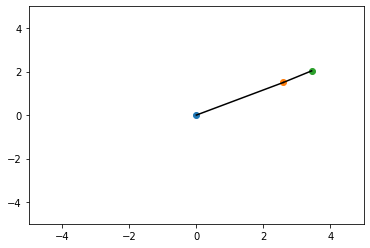

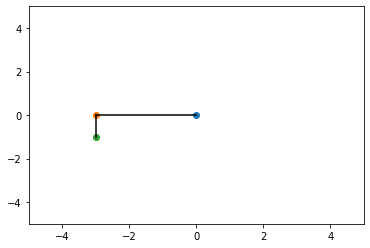

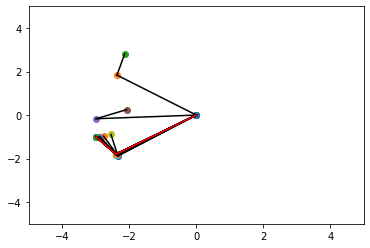

In [9]:
####### Original position calculation
p0 = np.array([0., 0., 0., 1.])

d1 = 3
d2 = 1

q1, q2 = pi/6, 0.04

T01 = dh_matrix(q1, 0, d1, 0)
T02 = dh_matrix(q1, 0, d1, 0) @ dh_matrix(q2, 0, d2, 0)
# print(T01, '\n', T02, '\n', T01@T02)

p1 = dh_matrix(q1, 0, d1, 0) @ p0
p2 = dh_matrix(q1, 0, d1, 0) @ dh_matrix(q2, 0, d2, 0) @ p0


p = np.asarray([p0.T, p1.T, p2.T])


fig = plt.figure()
# ax = plt.axes(projection='3d')
ax = plt.axes()
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5);

for i in range(p.shape[0]):
#     print(p[i][0:2])
    ax.scatter(p[i][0], p[i][1])
    if i != 0:
        ax.plot([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], 'k')
        
p2_ori = p2
        
####### Desired position calculation
        
q1_desired, q2_desired = pi, pi/2

T01 = dh_matrix(q1_desired, 0, d1, 0)
T02 = dh_matrix(q1_desired, 0, d1, 0) @ dh_matrix(q2_desired, 0, d2, 0)
# print(T01, '\n', T02, '\n', T01@T02)

p1 = T01 @ p0
p2 = T02 @ p0


p = np.asarray([p0.T, p1.T, p2.T])

fig = plt.figure()
# ax = plt.axes(projection='3d')
ax = plt.axes()
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5);

for i in range(p.shape[0]):
#     print(p[i][0:2])
    ax.scatter(p[i][0], p[i][1])
    if i != 0:
        ax.plot([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], 'k')

p2_des = p2

print("p2_ori", p2_ori)
print("p2_des", p2_des)
dpx, dpy = (p2_des - p2_ori)[:2]
print("p2_displacement", dpx, dpy)

q1, q2 = pi/6, 0.04
gain_factor = 0.5
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5);

for i in range(20):
    dq1, dq2 = inv_jacobian(q1, q2, d1, d2, dpx, dpy)
    q1 +=  gain_factor * dq1
    q2 +=  gain_factor * dq2
    T01 = dh_matrix(q1, 0, d1, 0)
    T02 = dh_matrix(q1, 0, d1, 0) @ dh_matrix(q2, 0, d2, 0)
    # print(T01, '\n', T02, '\n', T01@T02)
    
    # calculate d_p2
    p1 = dh_matrix(q1, 0, d1, 0) @ p0
    p2 = dh_matrix(q1, 0, d1, 0) @ dh_matrix(q2, 0, d2, 0) @ p0
    dpx, dpy = (p2_des - p2)[:2]
#     print("p2_displacement", dpx, dpy)
    p1 = dh_matrix(q1, 0, d1, 0) @ p0
    p2 = dh_matrix(q1, 0, d1, 0) @ dh_matrix(q2, 0, d2, 0) @ p0


    p = np.asarray([p0.T, p1.T, p2.T])

    for i in range(p.shape[0]):
    #     print(p[i][0:2])
        ax.scatter(p[i][0], p[i][1])
        if i != 0:
            ax.plot([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], 'k')
            
for i in range(p.shape[0]):
    #     print(p[i][0:2])
        ax.scatter(p[i][0], p[i][1])
        if i != 0:
            ax.plot([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], 'r')
    


In [93]:
## see in this case => same point but with different approach